# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [0]:
import pandas as pd
import numpy as np
import random

In [0]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

In [215]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [216]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [217]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  
## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 10](#task10)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [218]:
# your code here
data.dtypes
# data.info
# data.describe

# Subject. Опечаток нет
data[(data.Subject != "Math") & (data.Subject != "Por")]

# school. Опечаток нет
data[(data.school != "GP") & (data.school != "MS")]

# sex. Опечатки: присутсвует m вместо M
data[(data.sex != "F") & (data.sex != "M")]
# Исправление опечатки
data.sex = data.sex.replace("m", "M")

# Проверка всех возростов на отсутствия опечаток
data[(data.age <= 0) & (data.age >= 100)]

# address. Опечаток нет
data[(data.address != "U") & (data.address != "R")]

# famsize. Опечаток нет
data[(data.famsize != "GT3") & (data.famsize != "LE3")]

# Pstatus. Опечатки: присутсвует t вместо T
data[(data.Pstatus != "T") & (data.Pstatus != "A")]
# Исправление опечаток
data.Pstatus = data.Pstatus.replace("t", "T")

# Medu. Fedu. Опечатки: присутствует о вместо 0
data.Medu = data.Medu.apply(str)
data.Fedu = data.Fedu.apply(str)
data[(data.Medu != '0')& (data.Medu != '1') & (data.Medu != "2") & (data.Medu != "3") & (data.Medu != '4')]
data[(data.Fedu != '0') & (data.Fedu != '4') & (data.Fedu != '1') & (data.Fedu != "2") & (data.Fedu != "3")]
data.Medu = data.Medu.replace("o", "0")
data.Fedu = data.Fedu.replace("o", "0")
data.Medu = data.Medu.apply(pd.to_numeric)
data.Fedu = data.Fedu.apply(pd.to_numeric)

# Mjob. Fjob. Опечатки: присутствует at-home вместо at_home
data[(data.Mjob != "teacher") & (data.Mjob != "health") & (data.Mjob != "services") & (data.Mjob != "at_home") & (data.Mjob != "other")]
data.Mjob = data.Mjob.replace("at-home", "at_home")
data[(data.Fjob != "teacher") & (data.Fjob != "health") & (data.Fjob != "services") & (data.Fjob != "at_home") & (data.Fjob != "other")]
data.Fjob = data.Fjob.replace("at-home", "at_home")

# Опечаток нет
data[(data.reason != "home") & (data.reason != "reputation") & (data.reason != "course") & (data.reason != "other")]

# guardian. Опечатки: присутствует futher вместо father
data[(data.guardian != "mother") & (data.guardian != "father") & (data.guardian != "other")]
data.guardian = data.guardian.replace("futher", "father")

# Опечаток нет
data[(data.traveltime != 0)& (data.traveltime != 1) & (data.traveltime != 2) & (data.traveltime != 3) & (data.traveltime != 4)]

# Опечаток нет
data[(data.studytime != 0)& (data.studytime != 1) & (data.studytime != 2) & (data.studytime != 3) & (data.studytime != 4)]

# Опечаток нет
data[(data.failures != 0)& (data.failures != 1) & (data.failures != 2) & (data.failures != 3) & (data.failures != 4)]

# Опечаток нет
data[(data.schoolsup != "yes") & (data.schoolsup != "no")]

# Опечаток нет
data[(data.famsup != "yes") & (data.famsup != "no")]

# Опечаток нет
data[(data.paid != "yes") & (data.paid != "no")]

# Опечаток нет
data[(data.activities != "yes") & (data.activities != "no")]

# Опечаток нет
data[(data.nursery != "yes") & (data.nursery != "no")]

# Опечаток нет
data[(data.higher != "yes") & (data.higher != "no")]

# Опечаток нет
data[(data.internet != "yes") & (data.internet != "no")]

# Опечаток нет, но есть NaN
data[(data.romantic != "yes") & (data.romantic != "no")]


# data.famrel = data.famrel.apply('int64')
data[(data.famrel < 0) | (data.famrel > 5)]


data[(data.freetime < 0) | (data.freetime > 5)]


data[(data.goout < 0) | (data.goout > 5)]


# data.Dalc = data.Dalc.apply('int64') # NaN. Не меняю тип иначе вместо НаН будет -9223372036854775808
# data[(data.Dalc < 0.0) | (data.Dalc > 5.0)]
data[(data.Dalc != 0.0) & (data.Dalc != 1.0) & (data.Dalc != 2.0) & (data.Dalc != 3.0) & (data.Dalc != 4.0) & (data.Dalc != 5.0)]

# data.Walc = data.Walc.apply('int64') # NaN. менять тип не стоит
data[(data.Walc != 0.0) & (data.Walc != 1.0) & (data.Walc != 2.0) & (data.Walc != 3.0) & (data.Walc != 4.0) & (data.Walc != 5.0)]
# data[(data.Walc < 0) | (data.Walc > 5)]


# data[(data.health < 0) | (data.health > 5)]
data[(data.health != 0) & (data.health != 1) & (data.health != 2) & (data.health != 3) & (data.health != 4) & (data.health != 5)]

# Опечаток нет
data[(data.absences < 0) | (data.absences > 100)]

# NaN Опечаток нет
data[(data.cheating != "yes") & (data.cheating != "no")]

# Опечаток и NaN нет
data[(data.G1 < 0) | (data.G1 > 20)]
data[(data.G2 < 0) | (data.G2 > 20)]
data[(data.G3 < 0) | (data.G3 > 20)]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3


### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [219]:
# your code here
for i in list(data):
  if data[i].isnull().values.any():
    print(i, 'have NaN')

# Заполняем случайным образом
data['romantic'].fillna(random.choice(["yes", "no"]), inplace=True)

# Заполняем случайным образом
data['cheating'].fillna(random.choice(["yes", "no"]), inplace=True)

# Заполняем пропуски средним значением
data['famrel'].fillna(data.famrel.mean(), inplace=True)

# Заполняем пропуски медианой
data['Dalc'].fillna(data.Dalc.median(), inplace=True)

# Заполняем пропуски модой
data['Walc'].fillna(data.Walc.mode(), inplace=True)

romantic have NaN
famrel have NaN
Dalc have NaN
Walc have NaN
cheating have NaN


### Задание 3  
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

In [229]:
# your code here

# Числовые
print(data.describe())

# Категориальные
for i in list(data):
  if data[i].dtype == 'object':
    print(data[i].describe(), '\n')
    # print('Подсчёт количества:', i, data[i].value_counts(), '\n')
    # print('Min:',i, data[i].min(), '\n')
    # print('Max', i, data[i].max(), '\n')
    # print('Mode', i, data[i].mode(), '\n')

# Сколько студентов посещают каждую из школ? 
print(data.school.value_counts()) # с дубликатами

# Удаление дубликатов
# dropColums = ['ID', 'Subject', 'G1', 'G2', 'G3', 'G4','absences', 'paid']
# data2 = data.drop_duplicates(set(data.keys()) - set(dropColums)).copy()



# Сколько студентов посещают математику, сколько - португальский?
print(data.Subject.value_counts())

# Студенты какого курса чаще заваливают экзамены?
print(data[data.Subject == "Por"].failures.sum())
print(data[data.Subject == "Math"].failures.sum())

# # Сколько в среднем времени в неделю уходит на учебу по каждому предмету?
print(data[data.Subject == "Por"].studytime.mean())
print(data[data.Subject == "Por"].studytime.mean())


# На что чаще обращают внимание при выборе школы?
print(data.reason.mode())
print(data.reason.value_counts())

                  ID          age         Medu         Fedu   traveltime  \
count  1044.000000    1044.000000  1044.000000  1044.000000  1044.000000   
mean   547057.194444  16.726054    2.603448     2.387931     1.522989      
std    263827.336666  1.239975     1.124907     1.099938     0.731727      
min    100097.000000  15.000000    0.000000     0.000000     1.000000      
25%    324017.500000  16.000000    2.000000     1.000000     1.000000      
50%    554339.500000  17.000000    3.000000     2.000000     1.000000      
75%    774486.000000  18.000000    4.000000     3.000000     2.000000      
max    999194.000000  22.000000    4.000000     4.000000     4.000000      

         studytime     failures       famrel     freetime        goout  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean   1.970307     0.264368     3.936170     3.201149     3.156130      
std    0.834353     0.656142     0.928812     1.031507     1.152575      
min    1.000000    

### Задание 4  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

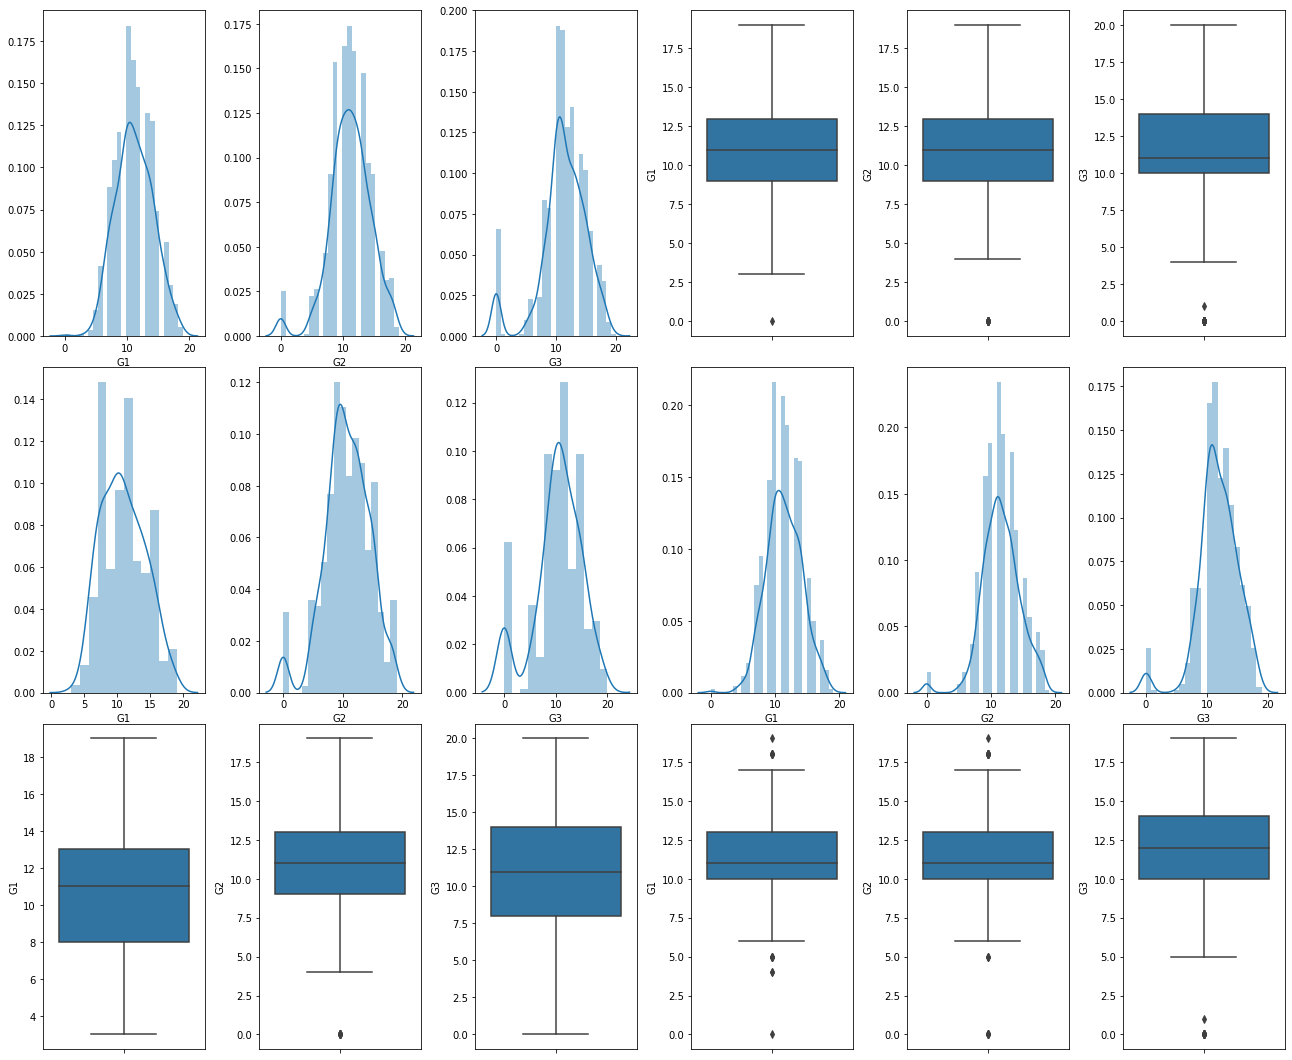

In [239]:
# your code here
%matplotlib inline
fig, axs = plt.subplots(3, 6)
fig.set_size_inches(18, 15)
fig.tight_layout(pad=1, w_pad=2, h_pad=1)

#
sns.distplot(data.G1, ax=axs[0,0])
sns.distplot(data.G2, ax=axs[0,1])
sns.distplot(data.G3, ax=axs[0,2])
sns.boxplot(x=data.G1, orient='v', ax=axs[0,3])
sns.boxplot(x=data.G2, orient='v', ax=axs[0,4])
sns.boxplot(x=data.G3, orient='v', ax=axs[0,5])

#
sns.distplot(data[data.Subject == "Math"].G1, ax=axs[1,0])
sns.distplot(data[data.Subject == "Math"].G2, ax=axs[1,1])
sns.distplot(data[data.Subject == "Math"].G3, ax=axs[1,2])
sns.distplot(data[data.Subject == "Por"].G1, ax=axs[1,3])
sns.distplot(data[data.Subject == "Por"].G2, ax=axs[1,4])
sns.distplot(data[data.Subject == "Por"].G3, ax=axs[1,5])

#
sns.boxplot(x=data[data.Subject == "Math"].G1, orient='v', ax=axs[2,0])
sns.boxplot(x=data[data.Subject == "Math"].G2, orient='v', ax=axs[2,1])
sns.boxplot(x=data[data.Subject == "Math"].G3, orient='v', ax=axs[2,2])
sns.boxplot(x=data[data.Subject == "Por"].G1, orient='v', ax=axs[2,3])
sns.boxplot(x=data[data.Subject == "Por"].G2, orient='v', ax=axs[2,4])
sns.boxplot(x=data[data.Subject == "Por"].G3, orient='v', ax=axs[2,5])


# АНАЛИЗ И ВЫВОДЫ
# Итоговая оценка колеблится в районе 10 - 13, и она чуть выше чем показатели первой  второй оценки.(Студенты постарались в конце года)
# Оценки по матеше у студентов немного ниже и менее плотные(8 - 13) в сравнение с португальским (10 - 13) (Очевидно же, ведь это МАТЕША)
# 

### Задание 5  
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

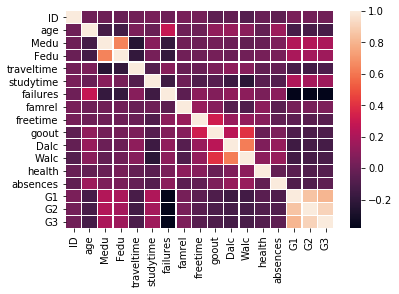

In [241]:
# your code here

corr = data.corr()
sns.heatmap(corr, linewidths=.10)

# Если значение таблице близко к нулю, то корреляции (зависимости) нет.
# Чем оно больше по модулю к 1, тем выше зависимость
# + прямая зависимость
# - обратная зависимость
# Можно считать, что при значении больше 0.5 есть зависимость и использовать это например в 11 пункте(Наверное)))))

### Задание 6  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


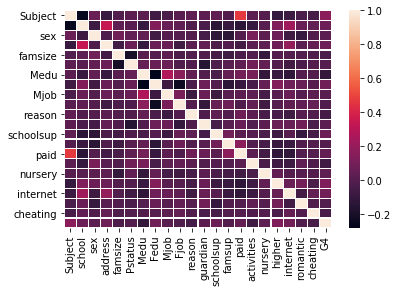

In [186]:
# your code here
data2 = data[:]
for i in data:
  if data[i].dtype == 'object':
    data2[i] = pd.factorize(data[i])[0]
  else:
    del data2[i]
data2

corr = data2.corr()
sns.heatmap(corr, linewidths=.10)

# То же самое, что и 5 пункт, только данные с типом object пришлось преобразовать в цифры, чтобы составить для них матрицу корреляции

### Задание  7  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

1.7770419426048565
2.732300884955752
1.2741116751269035
1.9484536082474226
453
Empty DataFrame
Columns: [ID, Subject, school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, cheating, G1, G2, G3]
Index: []
         count      mean       std  min  25%  50%  75%  max
address                                                    
R        285.0  1.589474  0.947510  1.0  1.0  1.0  2.0  5.0
U        759.0  1.455863  0.895806  1.0  1.0  1.0  2.0  5.0
         count      mean       std  min  25%  50%  75%  max
address                                                    
R        283.0  2.385159  1.300597  1.0  1.0  2.0  3.0  5.0
U        751.0  2.255659  1.282141  1.0  1.0  2.0  3.0  5.0


         count      mean       std  min  25%  50%  75%  max
Pstatus                                                    

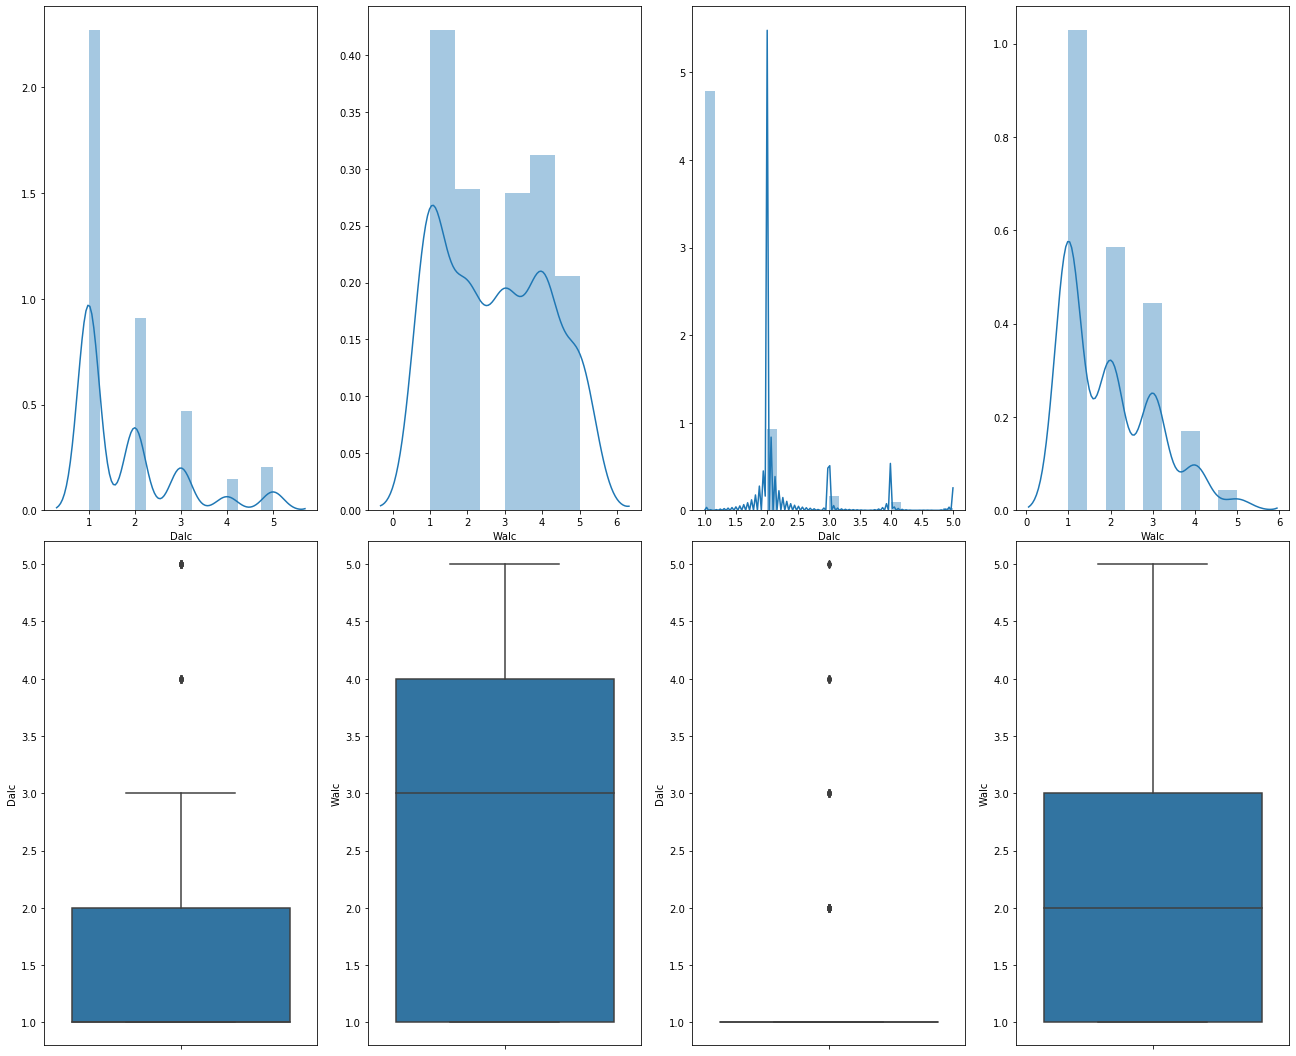

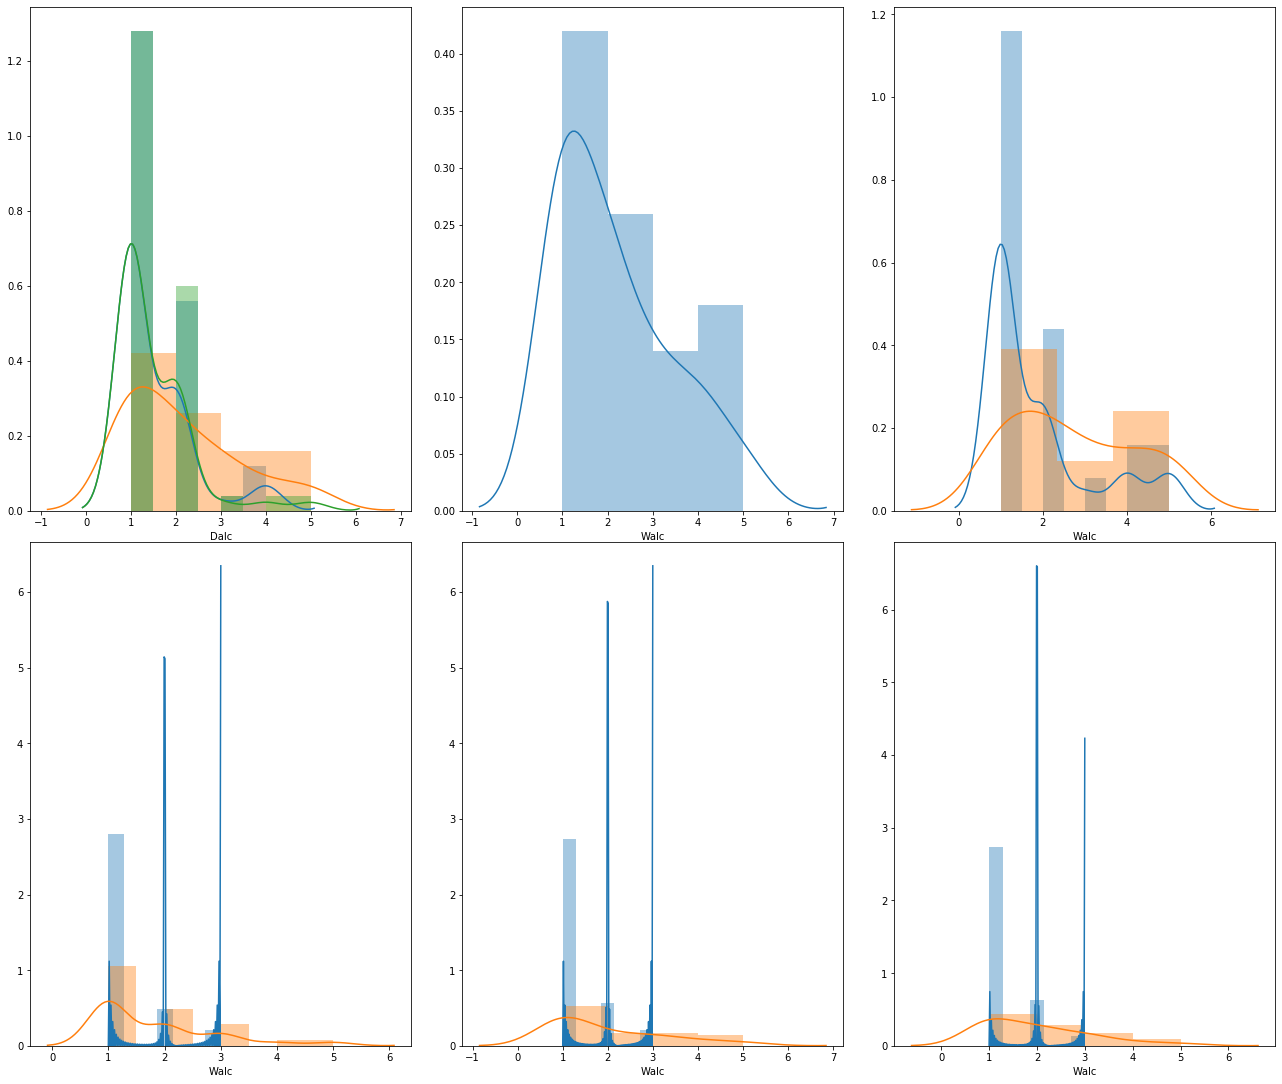

In [245]:
# your code here

# Парни пьют больше и на выходных, и в будни, но не существенно. 
# Парни: будни = 1.7770419426048565 выходные = 2.732300884955752
# Девушки: будни = 1.2741116751269035 выходные = 1.9484536082474226

# Загородом пьют больше и в будни, и в выходные
# Родители живут вместе и пьют тоже вместе, а значит и больше))))
# Кто не собирается получать высшее образование пьют больше
# Если есть романтические отношения, то по будням пьют больше, а по выходным ходят гулять в парк
# Чем больше своодного времени, тем больше люди пьют. Но если совсем свободного времени нет, то после работы могут выпить пива с друзьями чуть чаще
# Чем больше женьщина пьет, тем умнее становится, то есть наоборот, чем выше образование матери, тем больше она пьет. Ну а отцы наоборот тупеют с алкоголя.
# Чем выше оценка, тем меньше пьет студент(не успевает). В выходные все пьют больше,чем в будни


# Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
print(data[data.sex == 'M'].Dalc.mean())
print(data[data.sex == 'M'].Walc.mean())
print(data[data.sex == 'F'].Dalc.mean())
print(data[data.sex == 'F'].Walc.mean())
print(len(data[data.sex == 'M'].Dalc))
print((data[(data.sex == 'F') & (data.Dalc < 1)]))

fig, axs = plt.subplots(2, 4)
fig.set_size_inches(18, 15)
fig.tight_layout(pad=1, w_pad=2, h_pad=1)

sns.distplot(data[data.sex == 'M'].Dalc, ax=axs[0,0])
sns.distplot(data[data.sex == 'M'].Walc, ax=axs[0,1])
sns.distplot(data[data.sex == 'F'].Dalc, ax=axs[0,2])
sns.distplot(data[data.sex == 'F'].Walc, ax=axs[0,3])

sns.boxplot(x=data[data.sex == 'M'].Dalc, orient='v', ax=axs[1,0])
sns.boxplot(x=data[data.sex == 'M'].Walc, orient='v', ax=axs[1,1])
sns.boxplot(x=data[data.sex == 'F'].Dalc, orient='v', ax=axs[1,2])
sns.boxplot(x=data[data.sex == 'F'].Walc, orient='v', ax=axs[1,3])

# Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
for i in ['address', 'Pstatus', 'higher', 'romantic', 'freetime'] :
  grouped = data.groupby(i)
  print(grouped.Dalc.describe())
  print(grouped.Walc.describe())
  print(),print()

# Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
grouped = data.groupby('Medu')
print(grouped.Dalc.describe())
grouped = data.groupby('Fedu')
print(grouped.Dalc.describe())

# Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по G3). Выполните сравнение отдельно для каждого предмета (Math и Por). Дайте содержательный комментарий.

fig2, axs2 = plt.subplots(2, 3)
fig2.set_size_inches(18, 15)
fig2.tight_layout(pad=1, w_pad=2, h_pad=1)

# 50 худших
grouped = data.sort_values('G3').iloc[0:50].groupby('G3')
print(grouped.Dalc.describe())
print(grouped.Walc.describe())
sns.distplot(data.sort_values('G3').Dalc.iloc[0:50], ax=axs2[0,0])
sns.distplot(data.sort_values('G3').Walc.iloc[0:50], ax=axs2[0,0])

# 50 худших Math
data[data.Subject == 'Math'].sort_values('G3').iloc[0:50].groupby('G3')
print(grouped.Dalc.describe())
print(grouped.Walc.describe())
sns.distplot(data[data.Subject == 'Math'].sort_values('G3').Dalc.iloc[0:50], ax=axs2[0,0])
sns.distplot(data[data.Subject == 'Math'].sort_values('G3').Walc.iloc[0:50], ax=axs2[0,1])

# 50 худших Por
data[data.Subject == 'Por'].sort_values('G3').iloc[0:50].groupby('G3')
print(grouped.Dalc.describe())
print(grouped.Walc.describe())
sns.distplot(data[data.Subject == 'Por'].sort_values('G3').Dalc.iloc[0:50], ax=axs2[0,2])
sns.distplot(data[data.Subject == 'Por'].sort_values('G3').Walc.iloc[0:50], ax=axs2[0,2])


# 50 лучших
grouped = data.sort_values('G3', ascending=False).iloc[0:50].groupby('G3')
print(grouped.Dalc.describe())
print(grouped.Walc.describe())
sns.distplot(data.sort_values('G3', ascending=False).Dalc.iloc[0:50], ax=axs2[1,0])
sns.distplot(data.sort_values('G3', ascending=False).Walc.iloc[0:50], ax=axs2[1,0])

# 50 лучших Math
data[data.Subject == 'Math'].sort_values('G3', ascending=False).iloc[0:50].groupby('G3')
print(grouped.Dalc.describe())
print(grouped.Walc.describe())
sns.distplot(data[data.Subject == 'Math'].sort_values('G3', ascending=False).Dalc.iloc[0:50], ax=axs2[1,1])
sns.distplot(data[data.Subject == 'Math'].sort_values('G3', ascending=False).Walc.iloc[0:50], ax=axs2[1,1])

# 50 лучших Por
data[data.Subject == 'Por'].sort_values('G3').iloc[0:50].groupby('G3')
print(grouped.Dalc.describe())
print(grouped.Walc.describe())
sns.distplot(data[data.Subject == 'Por'].sort_values('G3', ascending=False).Dalc.iloc[0:50], ax=axs2[1,2])
sns.distplot(data[data.Subject == 'Por'].sort_values('G3', ascending=False).Walc.iloc[0:50], ax=axs2[1,2])


### Задание 8     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

In [248]:
# your code here

# Пола
grouped = data.groupby('sex')
print(grouped.G3.describe())

# Времени в пути от дома до школы
grouped = data.groupby('traveltime')
print(grouped.G3.describe())

# Наличия дополнительной помощи в учебе (от членов семьи или вообще)
grouped = data.groupby('schoolsup')
print(grouped.G3.describe())
grouped = data.groupby('famsup')
print(grouped.G3.describe())

# Посещения платных дополнительных занятий
grouped = data.groupby('paid')
print(grouped.G3.describe())

# Наличия интернета
grouped = data.groupby('internet')
print(grouped.G3.describe())

# Наличия романтических отношений
grouped = data.groupby('romantic')
print(grouped.G3.describe())

# Употребления алкоголя 
grouped = data.groupby('Dalc')
print(grouped.G3.describe())
grouped = data.groupby('Walc')
print(grouped.G3.describe())

# Пол на оценку не влияет
# Время в путешествиях до школы и обратно влияет самую малось только
# Дополнительные помощь поднимают средний был на единицу
# А вот помощь родителей бесполезна
# Платные доп занятия почти тоже не влияют
# Наличие интернета увеличивает бал на единицу(гугл всегда помогает)
# Романтические отношения портят оценку на 1 бал
# Ну пьют все. Больше всего самые отстающие, и отличники тоже неплохо. А посередине просидание.
# А на выходных устраивают вписки и пьют все примерно одинаково

     count       mean       std  min   25%   50%   75%   max
sex                                                         
F    591.0  11.448393  3.874334  0.0  10.0  12.0  14.0  19.0
M    453.0  11.203091  3.852167  0.0  10.0  11.0  14.0  20.0
            count       mean       std  min    25%   50%   75%   max
traveltime                                                          
1           623.0  11.645265  3.825495  0.0  10.00  12.0  14.0  20.0
2           320.0  11.018750  3.929587  0.0  10.00  11.0  13.0  19.0
3           77.0   10.597403  3.961192  0.0  9.00   11.0  13.0  18.0
4           24.0   10.166667  2.884240  0.0  9.75   10.0  11.0  16.0
           count       mean       std  min   25%   50%   75%   max
schoolsup                                                         
no         925.0  11.451892  3.977087  0.0  10.0  12.0  14.0  20.0
yes        119.0  10.487395  2.708635  0.0  9.0   11.0  12.0  18.0
        count       mean       std  min   25%   50%   75%   max
famsup    

### Задание 9  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [250]:
# your code here

l1 = list(data.G3.copy())
for i in range(len(l1)):
  if (l1[i] <= 20) and (l1[i]>=18):
    l1[i] = 'Отлично'
  elif (l1[i] <= 17) and (l1[i]>=14):
    l1[i] = 'Хорошо'
  elif (l1[i] <= 13) and (l1[i]>=8):
    l1[i] = 'Удовлетворительно'
  else:
    l1[i] = 'Неудовлетворительно'
data['G4'] = l1
# data.describe

grouped = data.groupby('G4')
print(grouped.reason.describe())

grouped = data.groupby('reason')
print(grouped.G4.describe())


# Комментарий
# Больше всего оценок Удовл , а больше всего причин course.(Очень существенный разрыв от всех остальных вместе взятых)
# Поэтому и среднее значение и чаще всего встречающимися являются именно они.



# Не получилось((((
# condlist = [data[(data.G3 <= 20) & (data.G3 >= 18)], data[(data.G3 <= 17) & (data.G3 >= 14)], data[(data.G3 <= 13) & (data.G3 >= 8)], data[data.G3 < 8]]
# choicelist = ["Отлично", "Хорошо", "Удовлетворительно", "Неудовлетворительно"]
# print(np.select(condlist, choicelist))

                    count unique     top freq
G4                                           
Неудовлетворительно  100   4      course  46 
Отлично              35    4      course  13 
Удовлетворительно    650   4      course  282
Хорошо               259   4      course  89 
           count unique                top freq
reason                                         
course      430   4      Удовлетворительно  282
home        258   4      Удовлетворительно  168
other       108   4      Удовлетворительно  69 
reputation  248   4      Удовлетворительно  131


### Задание  10 <a id="task10"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [251]:
# your code here

dropColums = ['ID', 'Subject', 'G1', 'G2', 'G3', 'G4','absences', 'paid']
duplicates = data.sort_values('Subject').duplicated(set(data.keys()) - set(dropColums)).copy()
d = data[duplicates]

duplicates2 = data.sort_values('Subject', ascending=False).duplicated(set(data.keys()) - set(dropColums)).copy()
d2 = data[duplicates2]

print('Por\n', d.G3.describe(), '\n')
print('Math\n', d2.G3.describe())

# Таких студентов 224. Если добавить еще столбцов, котороые не надо учитывать, то меньше станет.
# Сортирую по предмету и ищу дубликаты. Потом тоже самое, но сортировка в обратную сторону. Получаю одних и тех же студентов. Но для разных предметов. 100% рабочий метод
# По матеши очевидно оценка ниже. Это же матешаааа.

Por
 count    224.000000
mean     12.812500 
std      2.867887  
min      0.000000  
25%      11.000000 
50%      13.000000 
75%      15.000000 
max      19.000000 
Name: G3, dtype: float64 

Math
 count    224.000000
mean     10.758929 
std      4.359918  
min      0.000000  
25%      9.000000  
50%      11.000000 
75%      14.000000 
max      19.000000 
Name: G3, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Задание 11  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [207]:
# your code here
l2 = []
def prediction(data2):
  l2.append(data[data.school == data2.school.iat[0]].G3.mode().iat[0])
  l2.append(data[data.studytime == data2.studytime.iat[0]].G3.mode().iat[0])
  l2.append(data[data.romantic == data2.romantic.iat[0]].G3.mode().iat[0])
  l2.append(data[data.famsup == data2.famsup.iat[0]].G3.mode().iat[0])
  res = pd.Series(l2).mode()[0]
  if (res <= 20) and (res>=18):
    return 'Отлично'
  elif (res <= 17) and (res>=14):
    return 'Хорошо'
  elif (res <= 13) and (res>=8):
    return 'Удовлетворительно'
  else:
    return 'Неудовлетворительно'

for i in range(5):
  print(prediction(data.iloc[i:i+1]))

# В большой часте предсказаний для данного датасета результаты будут правильными(потому что мода всего дата сета удовлетворительно), но модель крайне примитивна и проста(требовалась простая модель).

Удовлетворительно
Удовлетворительно
Удовлетворительно
Удовлетворительно
Удовлетворительно


### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [0]:
# your code here
# Ох уж эта матеша и алкоголь)